In [4]:
import pandas as pd
import tensorflow as tf

dataframe = pd.read_csv("Cars.csv")
dataframe = dataframe.drop(["v.id", "on road old", "on road now", "economy"], axis = 1)
dataframe

,years,km,rating,condition,top speed,hp,torque,current price
0,3,78945,1,2,177,73,123,351318.0
1,6,117220,5,9,148,74,95,285001.5
2,2,132538,2,8,181,53,97,215386.0
3,4,101065,4,3,197,54,116,244295.5
4,6,61559,3,9,160,53,105,531114.5
...,...,...,...,...,...,...,...,...
995,5,125092,1,6,171,95,97,190744.0
996,4,83370,2,9,161,101,120,419748.0
997,7,86722,1,8,196,113,89,405871.0
998,2,140478,4,5,184,112,128,74398.0


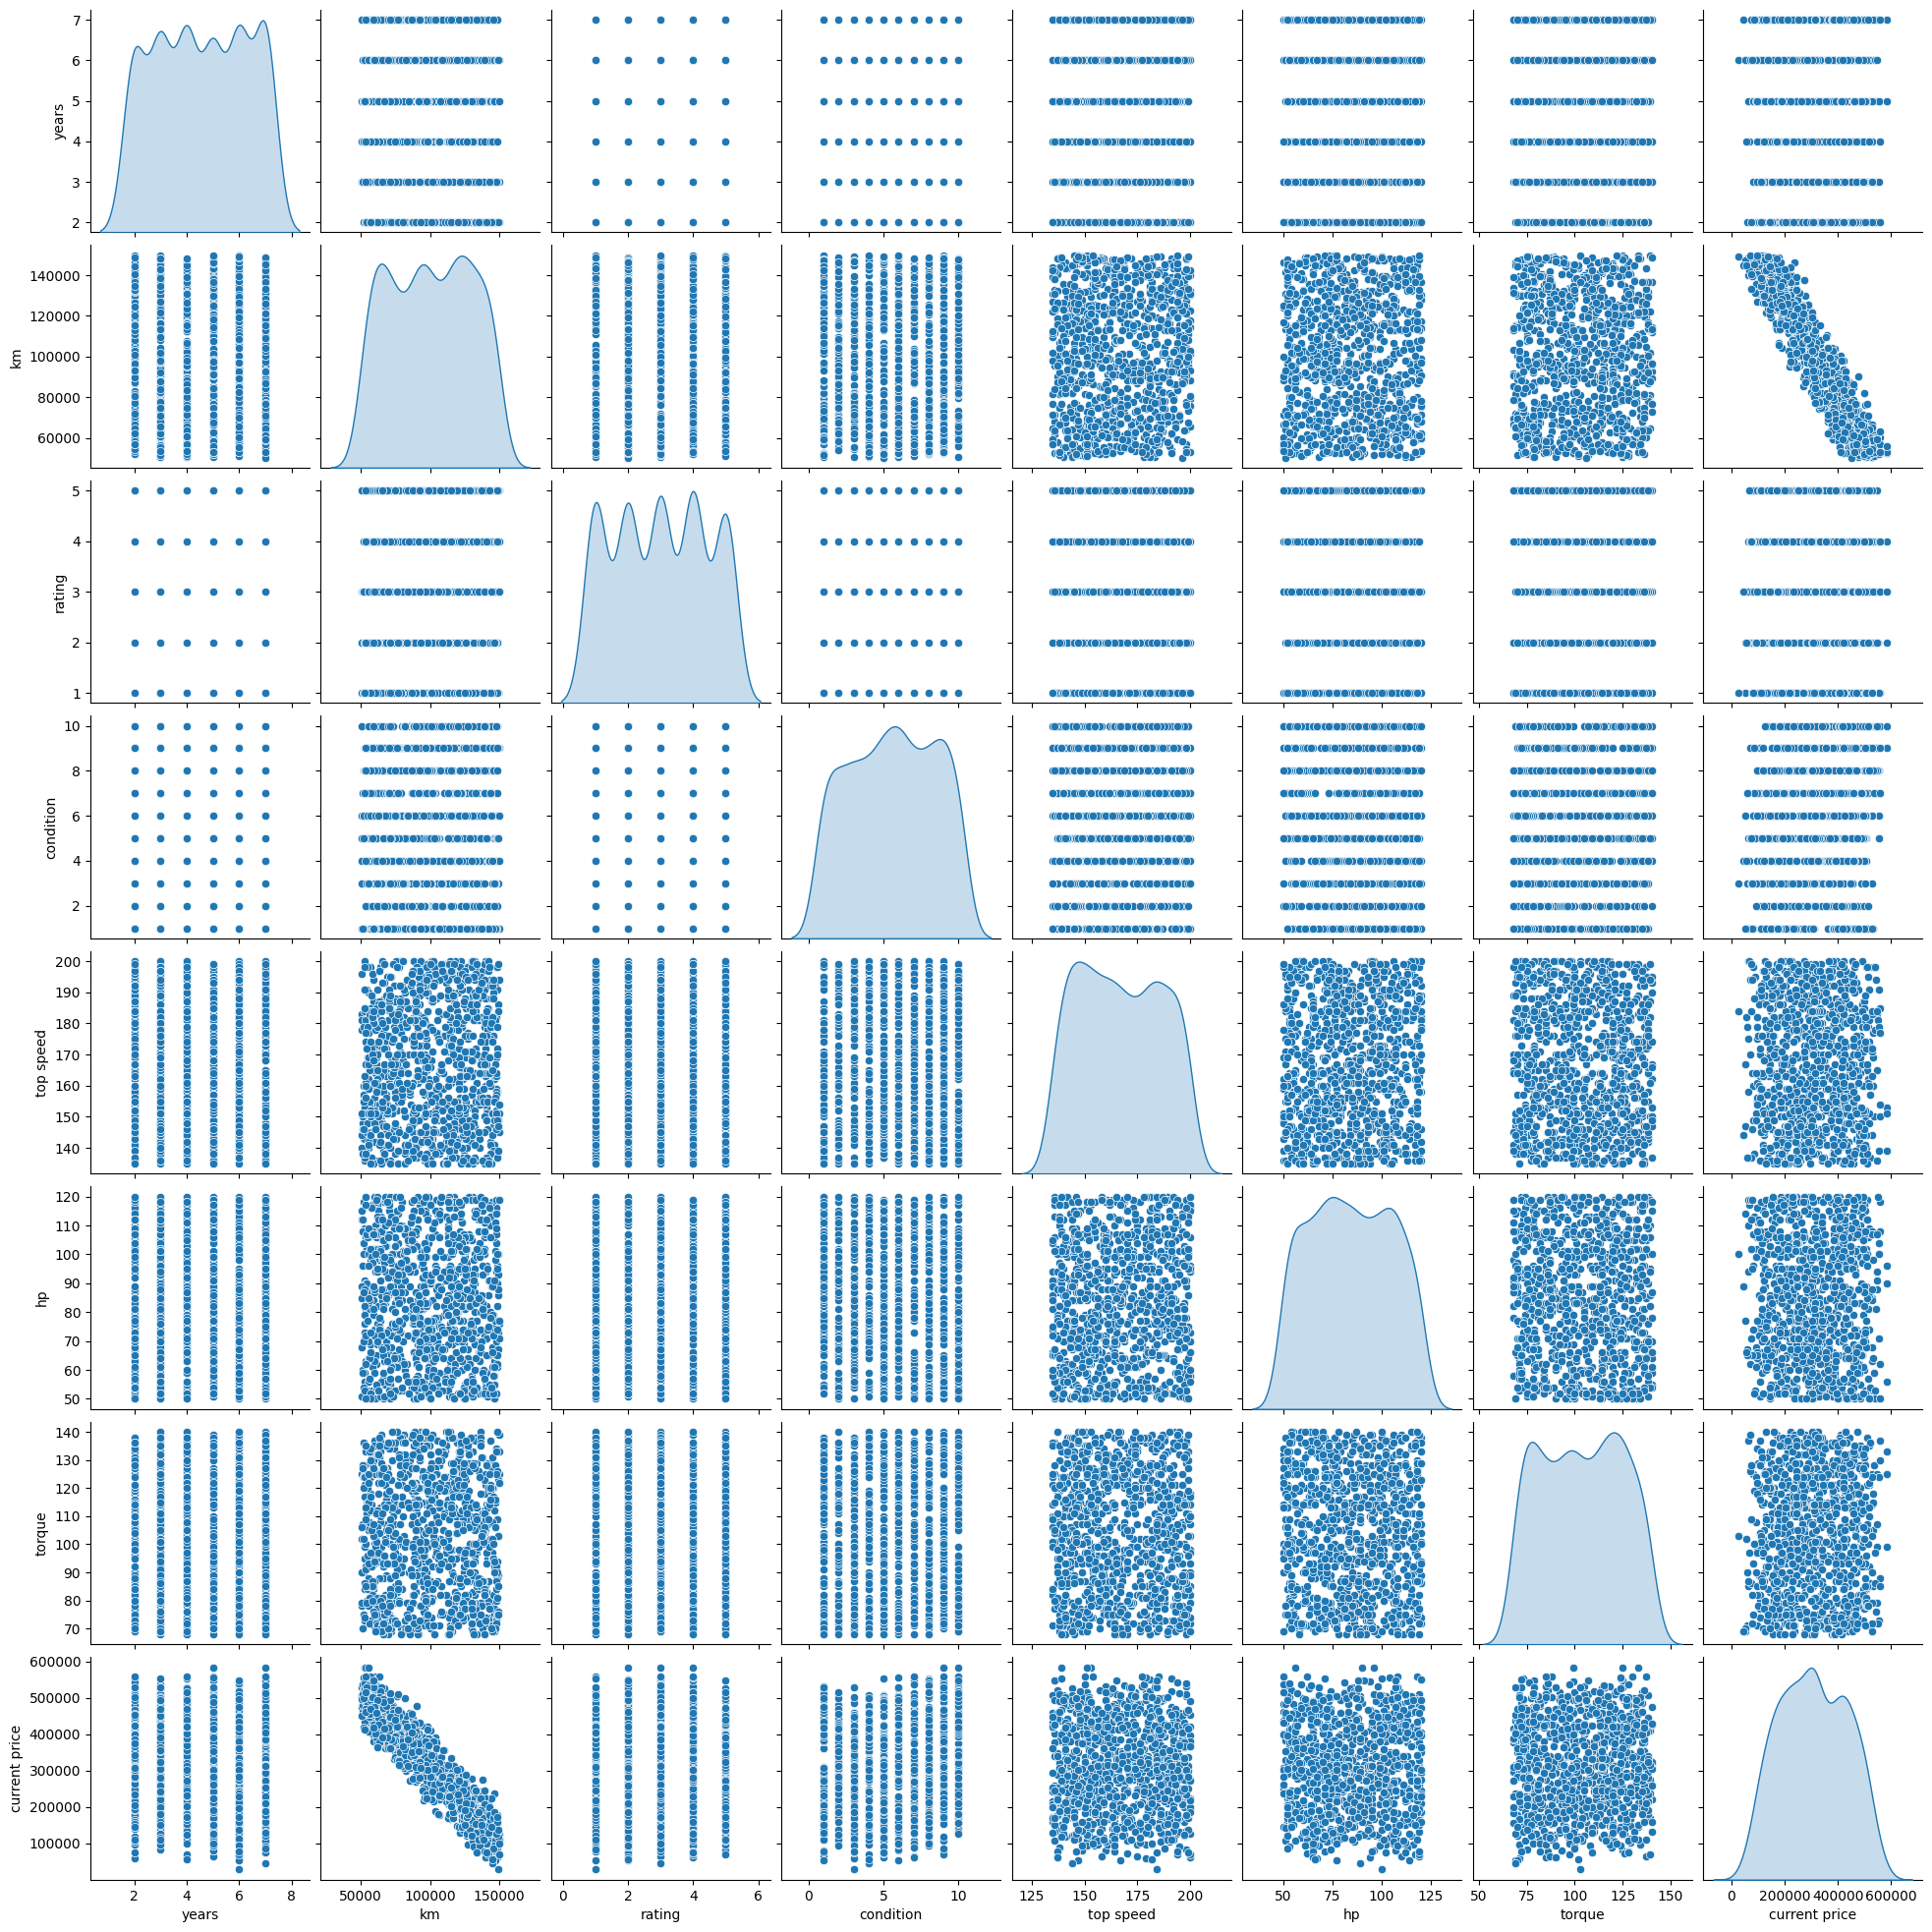

In [6]:
# Visualize Data
import seaborn as sb

sb.pairplot(data = dataframe, diag_kind='kde')

In [7]:
# Seperate the data
features = dataframe.iloc[:, :-1]
label = dataframe.iloc[:, -1]

# Feature scaling
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
scaled_features = feature_scaler.fit_transform(features)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, label.values, test_size = 0.2)
print(f"X_train: {len(X_train)}, X_test: {len(X_test)}, y_train: {len(y_train)}, y_test: {len(y_test)}")

X_train: 800, X_test: 200, y_train: 800, y_test: 200


In [21]:
### Build Neural Network
from keras import Sequential
ANN = Sequential()

from keras.layers import Dense, InputLayer
ANN.add( InputLayer(shape = (7,)) )
ANN.add( Dense(units = 8, activation = "relu") )
ANN.add( Dense(units = 8, activation = "relu") )
ANN.add( Dense(units = 8, activation = "relu") )
ANN.add( Dense(units = 8, activation = "relu") )
ANN.add( Dense(units = 8, activation = "relu") )
ANN.add( Dense(units = 1) )

### Train ANN
from keras.metrics import MeanSquaredError, R2Score
from keras.losses import MeanAbsoluteError
ANN.compile( optimizer = "adam", loss = MeanAbsoluteError(), metrics = [MeanSquaredError(), R2Score()] )
ANN.fit(scaled_features, label, epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 306792.3438 - mean_squared_error: 109722869760.0000 - r2_score: -6.0643
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 310377.6562 - mean_squared_error: 112076865536.0000 - r2_score: -6.1499 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 306979.3125 - mean_squared_error: 110887198720.0000 - r2_score: -5.6416 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 311382.7188 - mean_squared_error: 112426196992.0000 - r2_score: -6.2785 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 308028.2812 - mean_squared_error: 110782365696.0000 - r2_score: -5.9976
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 308244.5000 - mean_squared_error: 111351758848.0000 - r2_score: -5.8292 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 308090.5625 - mean_squared_error: 110413250560.0000 - r2_score: -6.1584
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 308578.4375 - mean_s

In [22]:
from sklearn.metrics import r2_score
prediction = ANN.predict( X_test )
r2_score(y_test, prediction)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


0.892884653229131

In [23]:
import numpy as np
y_test = y_test.reshape(len(y_test), 1)
prediction = prediction.reshape(len(prediction), 1)
np.concatenate( (y_test, prediction), 1 )

array([[206999.5      , 202491.3125   ],
       [360410.       , 337643.40625  ],
       [387321.5      , 310879.5625   ],
       [159647.       , 186590.96875  ],
       [558355.       , 493964.46875  ],
       [455824.5      , 427528.4375   ],
       [180948.       , 198582.84375  ],
       [472081.       , 471994.       ],
       [311773.5      , 212834.8125   ],
       [186388.5      , 205691.125    ],
       [144191.5      , 132903.5625   ],
       [503648.       , 471556.6875   ],
       [ 62737.       , 110672.375    ],
       [341076.       , 398593.84375  ],
       [221412.5      , 271135.3125   ],
       [425567.5      , 393860.9375   ],
       [120583.5      , 139182.8125   ],
       [225669.5      , 292695.9375   ],
       [301591.       , 257365.6875   ],
       [460780.       , 519687.5625   ],
       [432836.       , 432668.3125   ],
       [213768.5      , 209834.       ],
       [383570.5      , 356727.46875  ],
       [307008.       , 308952.0625   ],
       [157874. 